Quantium Virtual Internship - Retail Strategy and Analytics - Task 1

EDA -Exploratory data analysis

The initial phase of any analysis involves gaining a comprehensive understanding of the data. Let's delve into each of the provided datasets to glean insights

Transaction data Examination

In [ ]:
import pandas as pd

In [3]:
transaction_df = pd.read_excel('./data/QVI_transaction_data.xlsx')
# Display the first few rows of the DataFrame
transaction_df.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9


In [4]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [5]:
# Check the dimensions (rows, columns) of the DataFrame
transaction_df.shape

(264836, 8)

check for null values

In [6]:
#check for null values
transaction_df.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

There are no nulls in the columns

 We can see that the date column is in an integer format that is why we will covert it to more readable date format.

In [7]:
# Remove rows with missing dates
transaction_df = transaction_df.dropna(subset=['DATE'])
#transforming date column
transaction_df["DATE"]=pd.to_datetime(transaction_df["DATE"], origin = "1899-12-30",unit="D")

In [8]:
transaction_df["PROD_NAME"].describe()

count                                     264836
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

Verify the correctness of the product data by examining the 'PROD_NAME' column

In [9]:
# Examine the frequency of each unique value in 'PROD_NAME'
prod_name_counts = transaction_df['PROD_NAME'].value_counts().reset_index()
prod_name_counts.columns = ['PROD_NAME', 'Frequency']

# Display the result
print(prod_name_counts)

                                    PROD_NAME  Frequency
0      Kettle Mozzarella   Basil & Pesto 175g       3304
1    Kettle Tortilla ChpsHny&Jlpno Chili 150g       3296
2    Cobs Popd Swt/Chlli &Sr/Cream Chips 110g       3269
3      Tyrrells Crisps     Ched & Chives 165g       3268
4              Cobs Popd Sea Salt  Chips 110g       3265
..                                        ...        ...
109                  RRD Pc Sea Salt     165g       1431
110            Woolworths Medium   Salsa 300g       1430
111    NCC Sour Cream &    Garden Chives 175g       1419
112            French Fries Potato Chips 175g       1418
113         WW Crinkle Cut      Original 175g       1410

[114 rows x 2 columns]


Confirming that the products are indeed chips by conducting basic text analysis on the 'PROD_NAME' column

In [10]:
# Examine the words in 'PROD_NAME'
product_words = pd.DataFrame(transaction_df['PROD_NAME'].str.split().explode().unique(), columns=['words'])

# Display the result
print(product_words)

           words
0        Natural
1           Chip
2         Compny
3    SeaSalt175g
4            CCs
..           ...
215          Rst
216         Pork
217        Belly
218           Pc
219    Bolognese

[220 rows x 1 columns]


Cleaning up the set of product words to focus on relevant terms indicating whether a product is chips or not

In [11]:
import collections
# Count the frequency of each word in the 'PROD_NAME' column
freq = collections.Counter([j for s in transaction_df["PROD_NAME"] for j in s.split()])
# Create a DataFrame to store words and their frequencies
fre = pd.DataFrame([freq.keys(), freq.values()], index=['Word', 'Frequency']).transpose()
# Sort the DataFrame in decreasing order of word frequency
fre = fre.sort_values(by='Frequency', ascending=False)
# Remove words that start with a digit or '&'
# Remove words that start with a digit or '&'
fre = fre[~fre['Word'].str[0].str.isnumeric() & (fre['Word'].str[0] != '&')]
# Display the most frequent words
fre.head()

,Word,Frequency
11,Chips,49770
16,Kettle,41288
8,Smiths,28860
29,Salt,27976
6,Cheese,27890


The dataset contains salsa-based products, but we're only interested in the potato chips category, so we'll delete it.

In [12]:
#dropping salsa items
transaction_df.drop(transaction_df[[("Salsa" in s)  for s in transaction_df['PROD_NAME']]].index,inplace=True)
transaction_df[[("Salsa" in s)  for s in transaction_df['PROD_NAME']]]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


In [13]:
transaction_df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,2018-12-30 01:19:01.211467520,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828


In [14]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246742 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246742 non-null  datetime64[ns]
 1   STORE_NBR       246742 non-null  int64         
 2   LYLTY_CARD_NBR  246742 non-null  int64         
 3   TXN_ID          246742 non-null  int64         
 4   PROD_NBR        246742 non-null  int64         
 5   PROD_NAME       246742 non-null  object        
 6   PROD_QTY        246742 non-null  int64         
 7   TOT_SALES       246742 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.9+ MB


In [15]:
transaction_df.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

While there are no missing values in the dataset, a potential outlier is detected in the 'PROD_QTY' column, where a single transaction involves the purchase of 200 packets of chips. Further investigation is warranted to gain insights into this particular transaction

In [16]:
# Filter the dataset to find rows where 'PROD_QTY' is equal to 200
outliers = transaction_df[transaction_df['PROD_QTY'] == 200]
# Display the result
print(outliers)

            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


There are two transactions in which 200 packets of potato chips are purchased at once, and both transactions were carried out by the same customer.

In [17]:
# Filter the dataset to find rows where 'LYLTY_CARD_NBR' is equal to 226000
customer_transactions = transaction_df[transaction_df['LYLTY_CARD_NBR'] == 226000]
# Display the result
print(customer_transactions)

            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


This customer appears to have made only two transactions during the year, and is not an ordinary customer. It is possible that he is purchasing tokens for commercial purposes. We will remove this loyalty card number from further analysis.

In [18]:
# Filter out the customer based on the loyalty card number
transaction_df = transaction_df[transaction_df['LYLTY_CARD_NBR'] != 226000]
# Re-examine transaction data
print(transaction_df.describe())

                                DATE      STORE_NBR  LYLTY_CARD_NBR  \
count                         246740  246740.000000    2.467400e+05   
mean   2018-12-30 01:18:58.448569344     135.050361    1.355303e+05   
min              2018-07-01 00:00:00       1.000000    1.000000e+03   
25%              2018-09-30 00:00:00      70.000000    7.001500e+04   
50%              2018-12-30 00:00:00     130.000000    1.303670e+05   
75%              2019-03-31 00:00:00     203.000000    2.030832e+05   
max              2019-06-30 00:00:00     272.000000    2.373711e+06   
std                              NaN      76.786971    8.071520e+04   

             TXN_ID       PROD_NBR       PROD_QTY      TOT_SALES  
count  2.467400e+05  246740.000000  246740.000000  246740.000000  
mean   1.351304e+05      56.352213       1.906456       7.316113  
min    1.000000e+00       1.000000       1.000000       1.700000  
25%    6.756875e+04      26.000000       2.000000       5.800000  
50%    1.351815e+05      

Let's now look at the number of transaction rows over time to see if there are any obvious data problems, such as missing data.

In [19]:
# Count the number of transactions by date
transaction_count_by_date = transaction_df['DATE'].value_counts().reset_index()
transaction_count_by_date.columns = ['DATE', 'Transaction Count']
# Display the result
print(transaction_count_by_date)

          DATE  Transaction Count
0   2018-12-24                865
1   2018-12-23                853
2   2018-12-22                840
3   2018-12-19                839
4   2018-12-20                808
..         ...                ...
359 2019-06-24                612
360 2018-10-18                611
361 2018-11-25                610
362 2018-09-22                609
363 2019-06-13                607

[364 rows x 2 columns]


The dataset comprises 364 rows, corresponding to unique dates within the specified time frame. The observation of 364 rows suggests the presence of a potential missing date. To investigate further, we will generate a sequence of dates spanning from July 1, 2018, to June 30, 2019.

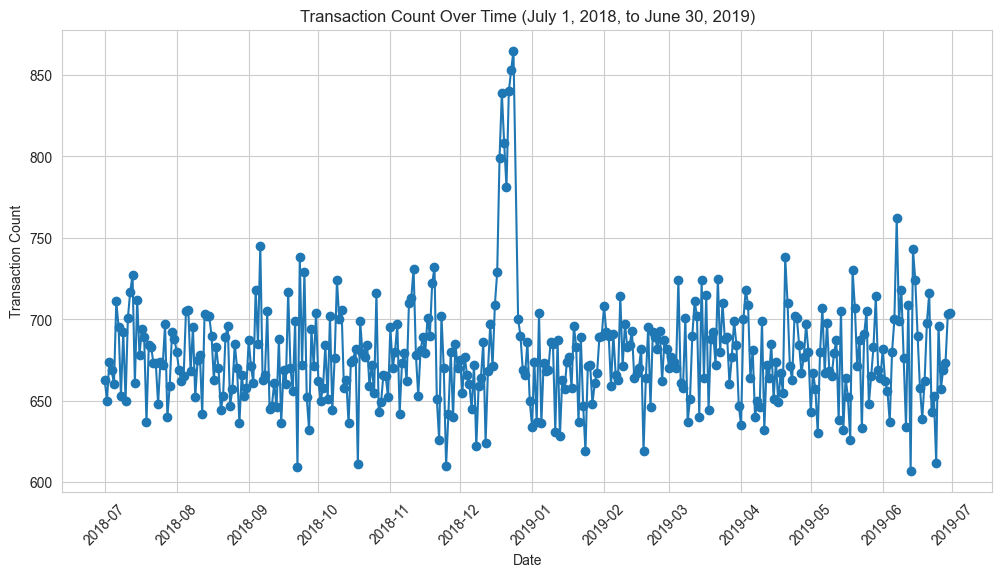

In [20]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # Import the dates module

# Assuming you have a DataFrame named transaction_df with a 'DATE' column
# If not, replace transaction_df with your actual DataFrame name

# Filter data for the desired date range
start_date = '2018-07-01'
end_date = '2019-06-30'
filtered_data = transaction_df[(transaction_df['DATE'] >= start_date) & (transaction_df['DATE'] <= end_date)]

# Count the number of transactions by date in the filtered data
transaction_count_by_date = filtered_data['DATE'].value_counts().reset_index()
transaction_count_by_date.columns = ['DATE', 'Transaction Count']

# Sort the DataFrame by date
transaction_count_by_date = transaction_count_by_date.sort_values(by='DATE')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(transaction_count_by_date['DATE'], transaction_count_by_date['Transaction Count'], marker='o')
plt.title('Transaction Count Over Time (July 1, 2018, to June 30, 2019)')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set major ticks to months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format the date as YYYY-MM
plt.grid(True)
plt.show()


We observe an increase in purchases in December and a break at the end of December.

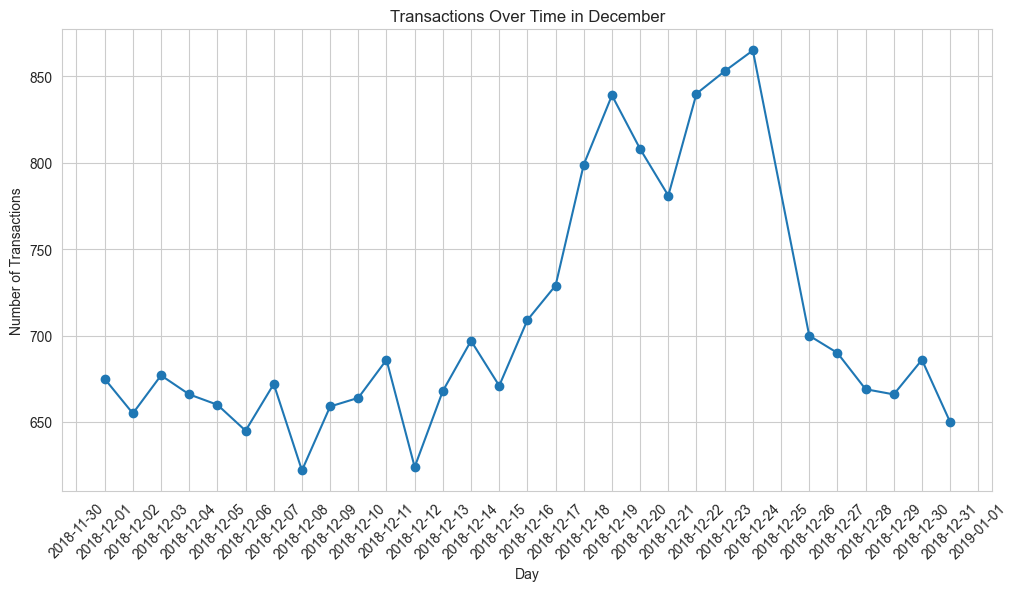

In [21]:
# Filter to December
december_data = transaction_count_by_date[transaction_count_by_date['DATE'].dt.month == 12]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(december_data['DATE'], december_data['Transaction Count'], marker='o', linestyle='-')
plt.title('Transactions Over Time in December')
plt.xlabel('Day')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.DayLocator())  # Set major ticks to days
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the date as YYYY-MM-DD
plt.grid(True)
plt.show()

We observe a notable uptick in sales leading up to Christmas, with no sales recorded on Christmas Day itself. This absence of sales on Christmas Day is attributed to the closure of shops during the holiday

In [22]:
# Extract digits from PROD_NAME to get the pack size
transaction_df['PACK_SIZE'] = transaction_df['PROD_NAME'].str.extract('(\d+)').astype(float)

# Check the count of each pack size and order by pack size
pack_size_counts = transaction_df['PACK_SIZE'].value_counts().sort_index()
print(pack_size_counts)

PACK_SIZE
70.0      1507
90.0      3008
110.0    22387
125.0     1454
134.0    25102
135.0     3257
150.0    40203
160.0     2970
165.0    15297
170.0    19983
175.0    66390
180.0     1468
190.0     2995
200.0     4473
210.0     6272
220.0     1564
250.0     3169
270.0     6285
330.0    12540
380.0     6416
Name: count, dtype: int64


The largest size is 380g and the smallest size is 70g

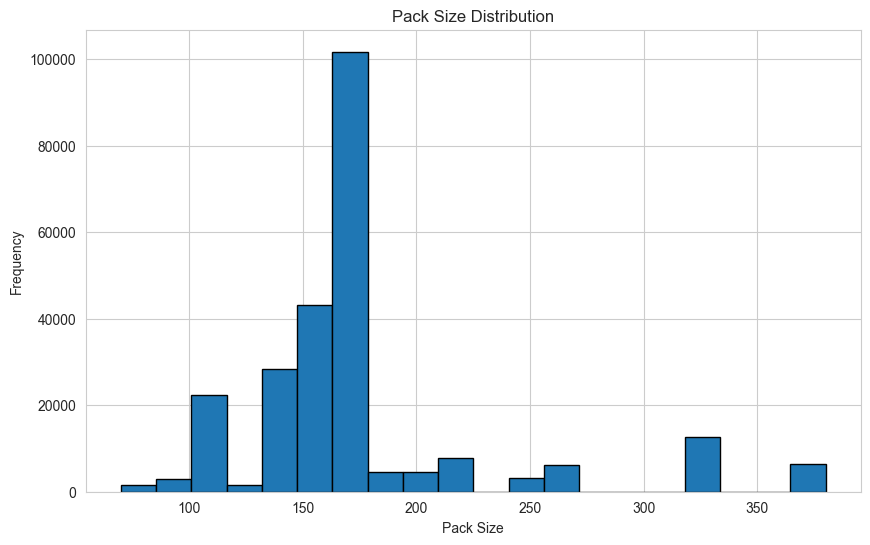

In [23]:
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(transaction_df['PACK_SIZE'], bins=20, edgecolor='black')
plt.title('Pack Size Distribution')
plt.xlabel('Pack Size')
plt.ylabel('Frequency')
plt.show()

The plot looks reasonable

In [24]:
# Extracting the brand from PROD_NAME
transaction_df['BRAND'] = transaction_df['PROD_NAME'].str.split().str[0].str.upper()
# Checking the count of each brand and ordering by count in descending order
brand_counts = transaction_df['BRAND'].value_counts().sort_values(ascending=False)
print(brand_counts)

BRAND
KETTLE        41288
SMITHS        27390
PRINGLES      25102
DORITOS       22041
THINS         14075
RRD           11894
INFUZIONS     11057
WW            10320
COBS           9693
TOSTITOS       9471
TWISTIES       9454
TYRRELLS       6442
GRAIN          6272
NATURAL        6050
CHEEZELS       4603
CCS            4551
RED            4427
DORITO         3183
INFZNS         3144
SMITH          2963
CHEETOS        2927
SNBTS          1576
BURGER         1564
WOOLWORTHS     1516
GRNWVES        1468
SUNBITES       1432
NCC            1419
FRENCH         1418
Name: count, dtype: int64


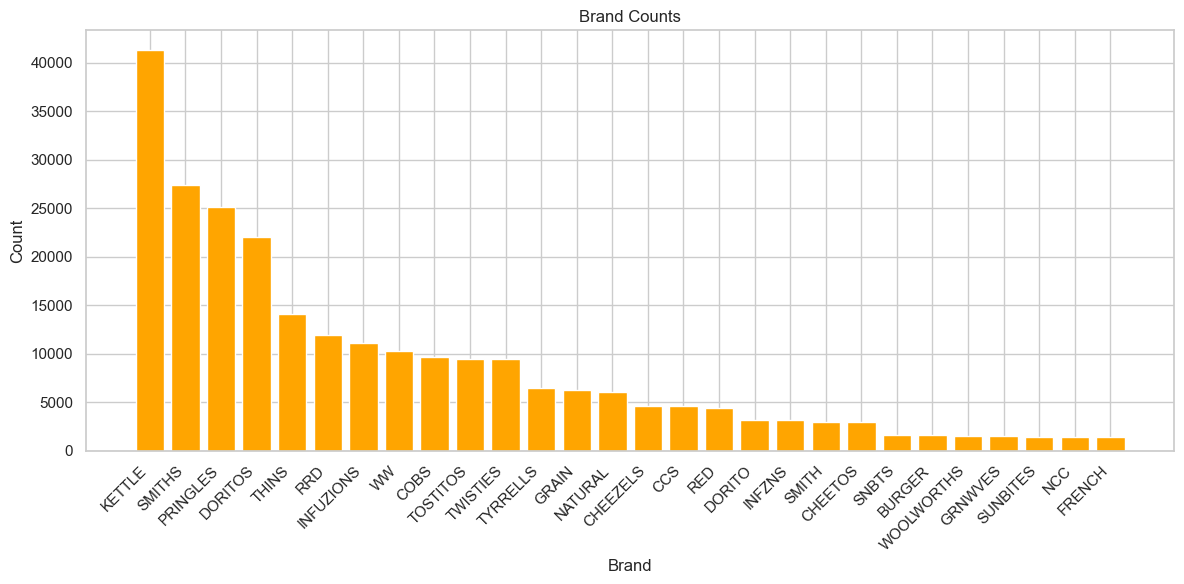

In [25]:
import seaborn as sns
# Extracting the brand from PROD_NAME
transaction_df['BRAND'] = transaction_df['PROD_NAME'].str.split().str[0].str.upper()
# Checking the count of each brand and ordering by count in descending order
brand_counts = transaction_df['BRAND'].value_counts().sort_values(ascending=False)
# Adding a column for brand number
brand_counts = brand_counts.reset_index()
brand_counts.columns = ['BRAND', 'COUNT']
brand_counts['BRAND_NUMBER'] = range(1, len(brand_counts) + 1)
# Set Seaborn style and color palette
sns.set(style="whitegrid")
colors = sns.color_palette("Set3", len(brand_counts))
# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(brand_counts['BRAND'], brand_counts['COUNT'], color='orange')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Brand Counts')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
# Displaying the bar chart
plt.show()

In [26]:
# Specify the full path to the directory
directory_path = './clean_data/QVI_transaction_data.csv'
# Save to CSV in the 'clean_data' directory
transaction_df.to_csv('./clean_data/QVI_transaction_data.csv', index=False)

Customer Data Examination

Having completed our examination of the transaction dataset and ensuring its integrity, let's shift our focus to explore the customer dataset

In [27]:
customer_df = pd.read_csv('./data/QVI_purchase_behaviour.csv')
customer_df.head(3)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget


In [28]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [29]:
customer_df.shape

(72637, 3)

In [30]:
#check for null values
customer_df.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [31]:
customer_df.info

<bound method DataFrame.info of        LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0                1000   YOUNG SINGLES/COUPLES          Premium
1                1002   YOUNG SINGLES/COUPLES       Mainstream
2                1003          YOUNG FAMILIES           Budget
3                1004   OLDER SINGLES/COUPLES       Mainstream
4                1005  MIDAGE SINGLES/COUPLES       Mainstream
...               ...                     ...              ...
72632         2370651  MIDAGE SINGLES/COUPLES       Mainstream
72633         2370701          YOUNG FAMILIES       Mainstream
72634         2370751          YOUNG FAMILIES          Premium
72635         2370961          OLDER FAMILIES           Budget
72636         2373711   YOUNG SINGLES/COUPLES       Mainstream

[72637 rows x 3 columns]>

Now, let's delve deeper into the details of the LIFESTAGE and PREMIUM_CUSTOMER columns for a more comprehensive understanding.

In [32]:
# Count occurrences of each lifestage and order by count in descending order
lifestage_counts = customer_df['LIFESTAGE'].value_counts().reset_index()
lifestage_counts.columns = ['LIFESTAGE', 'Count']
lifestage_counts = lifestage_counts.sort_values(by='Count', ascending=False)
# Display the result
print(lifestage_counts)

                LIFESTAGE  Count
0                RETIREES  14805
1   OLDER SINGLES/COUPLES  14609
2   YOUNG SINGLES/COUPLES  14441
3          OLDER FAMILIES   9780
4          YOUNG FAMILIES   9178
5  MIDAGE SINGLES/COUPLES   7275
6            NEW FAMILIES   2549


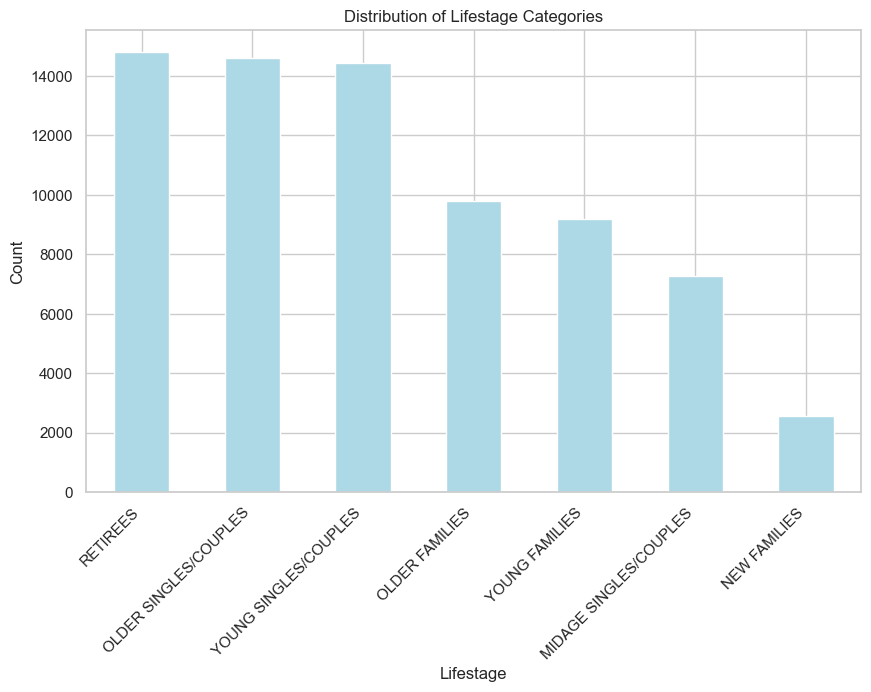

In [57]:
# Count occurrences of each lifestage
lifestage_counts =customer_df['LIFESTAGE'].value_counts()
# Plotting
plt.figure(figsize=(10, 6))
lifestage_counts.plot(kind='bar', color='lightblue')
plt.title('Distribution of Lifestage Categories')
plt.xlabel('Lifestage')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [34]:
premium_customer_counts = customer_df['PREMIUM_CUSTOMER'].value_counts().reset_index()
premium_customer_counts.columns = ['PREMIUM_CUSTOMER', 'Count']
premium_customer = premium_customer_counts.sort_values(by = 'Count', ascending=False)
print(premium_customer_counts)

  PREMIUM_CUSTOMER  Count
0       Mainstream  29245
1           Budget  24470
2          Premium  18922


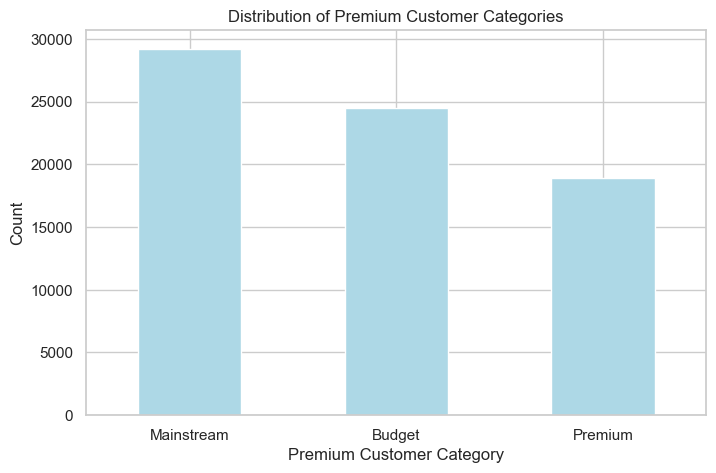

In [58]:
# Count occurrences of each premium customer category
premium_customer_counts = customer_df['PREMIUM_CUSTOMER'].value_counts()

# Plotting
plt.figure(figsize=(8, 5))
premium_customer_counts.plot(kind='bar', color='lightblue')
plt.title('Distribution of Premium Customer Categories')
plt.xlabel('Premium Customer Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Given that the customer data appears to be free of any apparent issues, we can proceed with the next step, which involves merging the transaction and customer datasets for a comprehensive analysis

In [36]:
# Merge transaction data to customer data using left join
data = pd.merge(transaction_df, customer_df, how='left', on='LYLTY_CARD_NBR')

As the number of rows in the consolidated dataset "data" matches that of the original "transactionData," we can confirm that no duplicate entries were introduced during the merging process. This assurance stems from our approach of performing a left join, where we retain all rows from the "transactionData" and augment them with details from matching rows in the second dataset


Let's ensure that our merging process was successful by verifying if there are any null values in the relevant customer columns, indicating unmatched customers

In [37]:
# Check for null values in the 'LIFESTAGE' column
null_count = data['LIFESTAGE'].isnull().sum()

# Display the number of null values in the 'LIFESTAGE' column
print("Number of null values in 'LIFESTAGE':", null_count)

Number of null values in 'LIFESTAGE': 0


In [38]:
# Check for null values in the 'LIFESTAGE' column
null_count = data['PREMIUM_CUSTOMER'].isnull().sum()

# Display the number of null values in the 'LIFESTAGE' column
print("Number of null values in 'PREMIUM_CUSTOMER':", null_count)

Number of null values in 'PREMIUM_CUSTOMER': 0


Excellent news – there are no missing values! This means that all customers present in the transaction data have corresponding entries in the customer dataset

Now, we can save our cleaned and consolidated data for future analysis

In [39]:
# Specify the full path to the directory
directory_path = './clean_data/QVI_data.csv'
# Save to CSV in the 'clean_data' directory
data.to_csv('./clean_data/QVI_data.csv', index=False)

Data analysis on customer segments

Now that our dataset is prepared for in-depth analysis, we can establish key performance metrics aligned with the client's interests
•Identifying the highest chip spenders based on total sales, detailing their lifestage, and gauging the premium nature of their general purchasing patterns.
•Quantifying the customer distribution across various segments.
•Examining the chips purchased per customer within each segment.
•Calculating the average chip price specific to each customer segment.

Let's begin by computing the total sales for each customer segment (LIFESTAGE and PREMIUM_CUSTOMER) and visualizing the distribution to identify the segments that contribute the most to chip sales

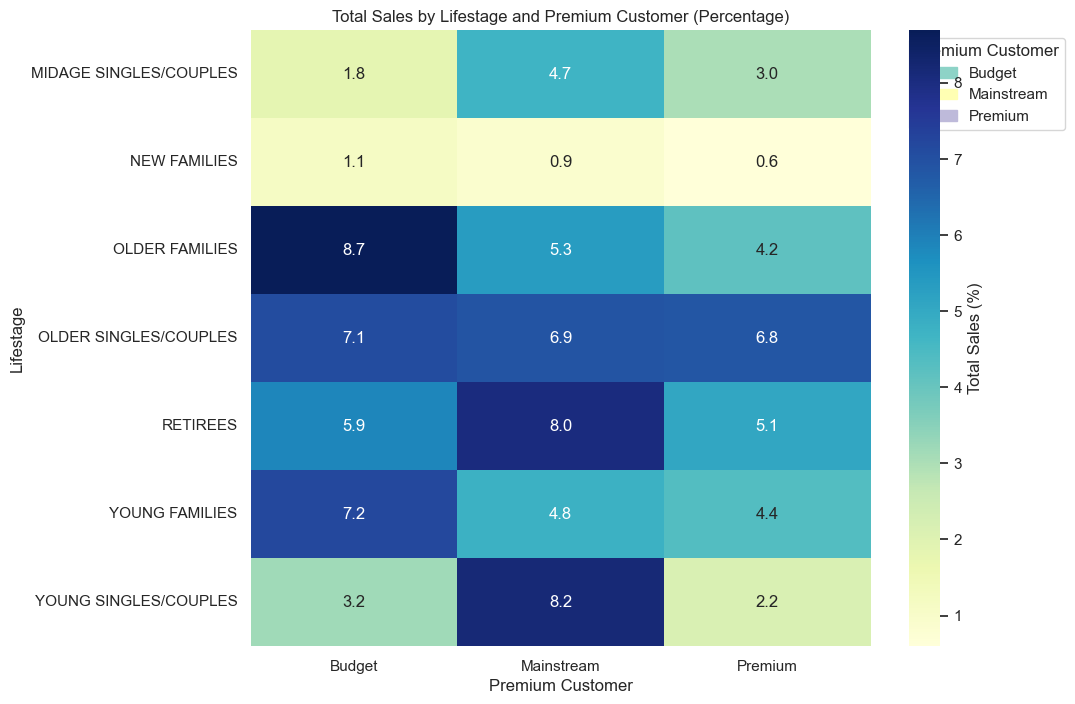

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Total sales by LIFESTAGE and PREMIUM_CUSTOMER
sales = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(SALES=('TOT_SALES', 'sum')).reset_index()

# Calculate the total sum of sales
total_sales = sales['SALES'].sum()

# Convert values to percentages
sales['SALES_PERCENT'] = (sales['SALES'] / total_sales) * 100

# Pivot the table for creating a heatmap
sales_heatmap = sales.pivot(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='SALES_PERCENT')


# Create a heatmap with the custom colormap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(sales_heatmap, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Total Sales (%)'})

# Add a legend with color indices
legend_labels = ['Budget', 'Mainstream', 'Premium']
legend_patches = [mpatches.Patch(color=colors[i], label=legend_labels[i]) for i in range(len(legend_labels))]
plt.legend(handles=legend_patches, title='Premium Customer', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Total Sales by Lifestage and Premium Customer (Percentage)')
plt.xlabel('Premium Customer')
plt.ylabel('Lifestage')
plt.show()


We can see that the primary contributors to sales are Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees

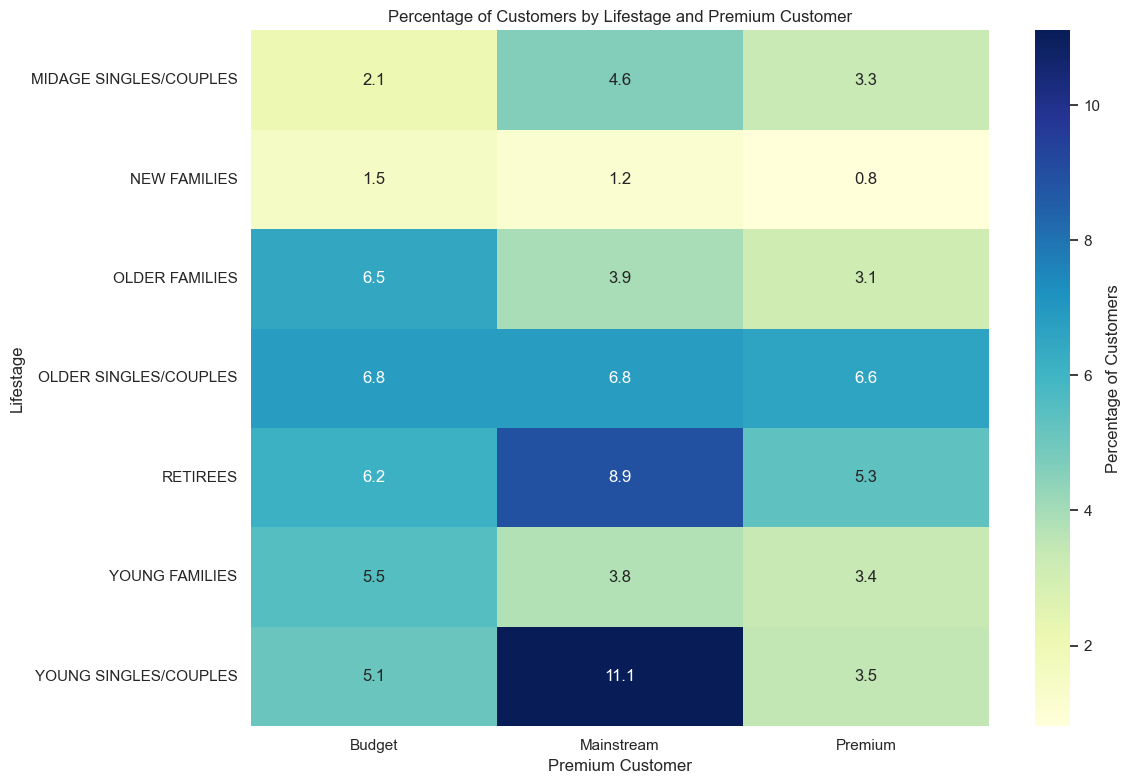

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Number of customers by LIFESTAGE and PREMIUM_CUSTOMER
customers = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(CUSTOMERS=('LYLTY_CARD_NBR', 'nunique')).reset_index()

# Calculate the total number of customers
total_customers = customers['CUSTOMERS'].sum()

# Convert values to percentages
customers['CUSTOMERS_PERCENT'] = (customers['CUSTOMERS'] / total_customers) * 100

# Pivot the table for creating a heatmap
customers_heatmap = customers.pivot(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='CUSTOMERS_PERCENT')

# Create a heatmap with the custom colormap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(customers_heatmap, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Percentage of Customers'})

plt.title('Percentage of Customers by Lifestage and Premium Customer')
plt.xlabel('Premium Customer')
plt.ylabel('Lifestage')
plt.tight_layout()
plt.show()


There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips. This contributes to there being more sales to these customer segments but this is not a major driver for the Budget - Older families segment.

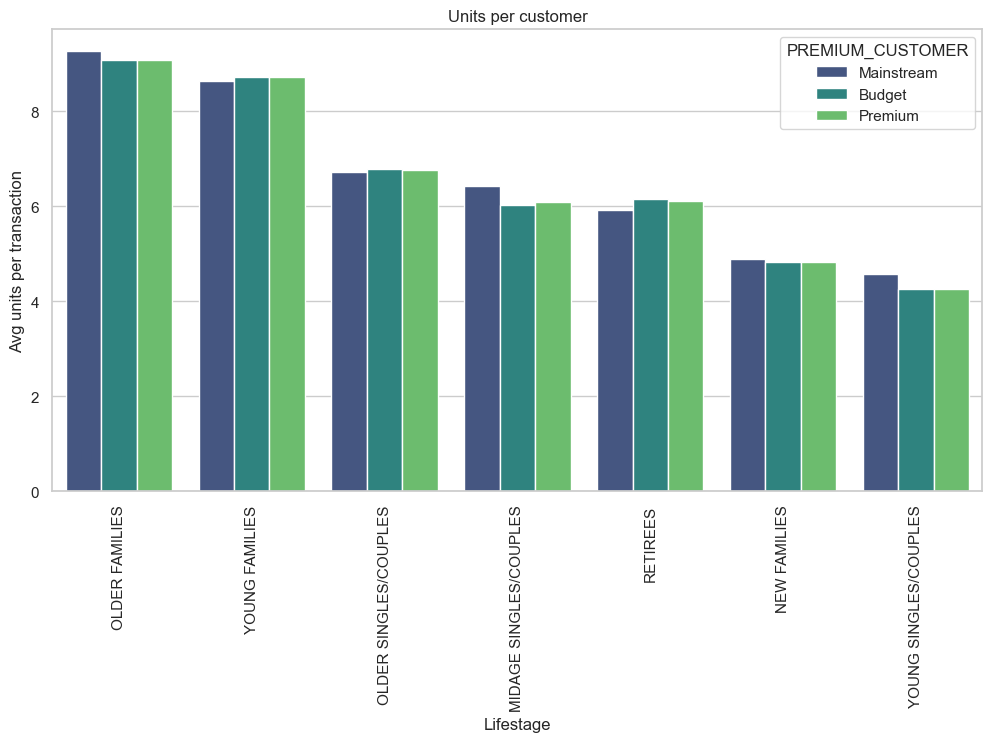

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the total units and unique customers for each group
avg_units = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(
    TOTAL_UNITS=('PROD_QTY', 'sum'),
    UNIQUE_CUSTOMERS=('LYLTY_CARD_NBR', 'nunique')
).reset_index()

# Calculate the average units per customer
avg_units['AVG'] = avg_units['TOTAL_UNITS'] / avg_units['UNIQUE_CUSTOMERS']

# Sort by average units in descending order
avg_units = avg_units.sort_values('AVG', ascending=False)

# Plot the results using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='LIFESTAGE', y='AVG', hue='PREMIUM_CUSTOMER', data=avg_units, palette='viridis')
plt.xlabel('Lifestage')
plt.ylabel('Avg units per transaction')
plt.title('Units per customer')
plt.xticks(rotation=90)
plt.show()


Older families and young families  buy more chips per customer

Now, let's explore the average price per unit of chips bought for each customer segment, as this metric is another factor influencing total sales.

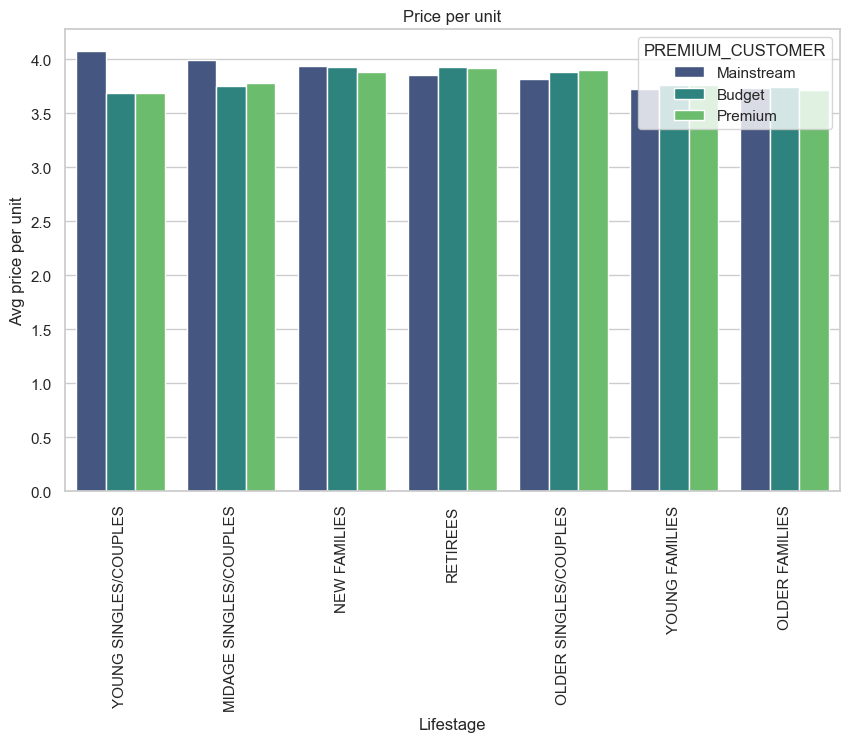

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming avg_price is already calculated
plt.figure(figsize=(10, 6))
sns.barplot(x='LIFESTAGE', y='AVG', hue='PREMIUM_CUSTOMER', data=avg_price, palette='viridis')
plt.xlabel('Lifestage')
plt.ylabel('Avg price per unit')
plt.title('Price per unit')
plt.xticks(rotation=90)
plt.show()

Mainstream midage and young singles and couples exhibit a higher willingness to pay more per packet of chips compared to their budget and premium counterparts. This trend may be attributed to premium shoppers, who are more inclined to purchase healthier snacks. Additionally, when premium shoppers do buy chips, it is often for entertainment purposes rather than personal consumption. The data also indicates a lower prevalence of premium midage and young singles and couples buying chips compared to their mainstream counterparts

Let's examine the statistical significance of the difference in average price per unit to determine if this variance is statistically significant.

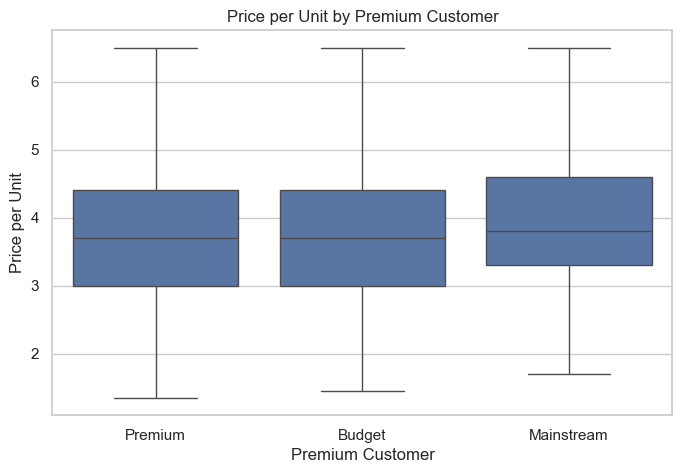

T-statistic: 37.83196107667815
P-value: 1.11782280577468e-309


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Assuming pricePerUnit is already calculated
data['pricePerUnit'] = data['TOT_SALES'] / data['PROD_QTY']

# Perform t-test
t_stat, p_value = ttest_ind(
    data[(data['LIFESTAGE'].isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"])) & (data['PREMIUM_CUSTOMER'] == "Mainstream")]['pricePerUnit'],
    data[(data['LIFESTAGE'].isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"])) & (data['PREMIUM_CUSTOMER'] != "Mainstream")]['pricePerUnit'],
    alternative="greater"
)

# Visualize the result
plt.figure(figsize=(8, 5))
sns.boxplot(x='PREMIUM_CUSTOMER', y='pricePerUnit', data=data[(data['LIFESTAGE'].isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"]))])
plt.title('Price per Unit by Premium Customer')
plt.xlabel('Premium Customer')
plt.ylabel('Price per Unit')
plt.show()

# Display t-test results
print(f'T-statistic: {t_stat}\nP-value: {p_value}')


Deep dive into specific customer segments for insights

We've uncovered several intriguing insights that warrant further investigation. One avenue to explore is the customer segments that contribute the most to sales, with the goal of retaining or boosting sales. As an example, let's delve into Mainstream - young singles/couples to determine if they exhibit a preference for a specific brand of chips

In [48]:
segment1 = data[(data['LIFESTAGE'] == "YOUNG SINGLES/COUPLES") & (data['PREMIUM_CUSTOMER'] == "Mainstream")]
other = data[~((data['LIFESTAGE'] == "YOUNG SINGLES/COUPLES") & (data['PREMIUM_CUSTOMER'] == "Mainstream"))]

quantity_segment1 = segment1['PROD_QTY'].sum()
quantity_other = other['PROD_QTY'].sum()

quantity_segment1_by_brand = segment1.groupby('BRAND').agg(targetSegment=('PROD_QTY', 'sum')) / quantity_segment1
quantity_other_by_brand = other.groupby('BRAND').agg(other=('PROD_QTY', 'sum')) / quantity_other

brand_proportions = quantity_segment1_by_brand.merge(quantity_other_by_brand, on='BRAND')
brand_proportions['affinityToBrand'] = brand_proportions['targetSegment'] / brand_proportions['other']
brand_proportions.sort_values(by='affinityToBrand', ascending=False)



,targetSegment,other,affinityToBrand
BRAND,,,
DORITO,0.015707,0.012760,1.231000
TYRRELLS,0.031553,0.025692,1.228095
TWISTIES,0.046184,0.037877,1.219319
DORITOS,0.107053,0.088315,1.212176
KETTLE,0.197985,0.165553,1.195897
TOSTITOS,0.045411,0.037978,1.195713
INFZNS,0.014934,0.012573,1.187790
PRINGLES,0.119420,0.100635,1.186670
GRAIN,0.029124,0.025121,1.159318


We observe that:
•Mainstream young singles/couples are approximately 23% more likely to purchase Tyrrells chips compared to the rest of the population.
•Mainstreamyoungsingles/couplesare are approximately 56% less likely topurchase Burger compared to the rest of the population.

Let's explore whether our focal customer segment tends to prefer purchasing larger chip pack sizes.

In [49]:
import pandas as pd

quantity_segment1_by_pack = segment1.groupby('PACK_SIZE').agg(targetSegment=('PROD_QTY', sum)) / quantity_segment1
quantity_other_by_pack = other.groupby('PACK_SIZE').agg(other=('PROD_QTY', sum)) / quantity_other

pack_proportions = pd.merge(quantity_segment1_by_pack, quantity_other_by_pack, on='PACK_SIZE')
pack_proportions['affinityToPack'] = pack_proportions['targetSegment'] / pack_proportions['other']
pack_proportions.sort_values(by='affinityToPack', ascending=False)

/var/folders/tz/36qz0vtn4rb0h9dh9ghf_dpr0000gp/T/ipykernel_5774/44210330.py:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  quantity_segment1_by_pack = segment1.groupby('PACK_SIZE').agg(targetSegment=('PROD_QTY', sum)) / quantity_segment1
/var/folders/tz/36qz0vtn4rb0h9dh9ghf_dpr0000gp/T/ipykernel_5774/44210330.py:4: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  quantity_other_by_pack = other.groupby('PACK_SIZE').agg(other=('PROD_QTY', sum)) / quantity_other


,targetSegment,other,affinityToPack
PACK_SIZE,,,
270.0,0.031829,0.025096,1.268287
380.0,0.032160,0.025584,1.257030
330.0,0.061284,0.050162,1.221717
134.0,0.119420,0.100635,1.186670
110.0,0.106280,0.089791,1.183637
210.0,0.029124,0.025121,1.159318
135.0,0.014769,0.013075,1.129511
250.0,0.014355,0.012781,1.123166
170.0,0.080773,0.080986,0.997370


It seems that young singles/couples are 27% more likely to buy a 270g pack of potato chips than the rest of the population, but let's see which brands sell this pack size.

In [50]:
result = data[data['PACK_SIZE'] == 270]['PROD_NAME'].unique()
print(result)

['Twisties Cheese     270g' 'Twisties Chicken270g']


As Twisties is the only brand to offer 270g packs, this result may reflect a greater likelihood of buying Twisties.

Findings
Let's summarize what we found!
Sales have mainly been due to Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees shoppers. We found that the high spend in chips for mainstream young singles/couples and retirees is due to there being more of them than other buyers. Mainstream, midage and young singles and couples are also more likely to pay more per packet of chips. This is indicative of impulse buying behaviour. We’ve also found that Mainstream young singles and couples are 23% more likely to purchase Tyrrells chips compared to the rest of the population. The Category Manager may want to increase the category’s performance by off-locating some Tyrrells and smaller packs of chips in discretionary space near segments where young singles and couples frequent more often to increase visibilty and impulse behaviour.